#  Digital Images

1.  Use the image of you choosing, show you image as a grayscale: 7 bit, 5 bit and 3 bit.


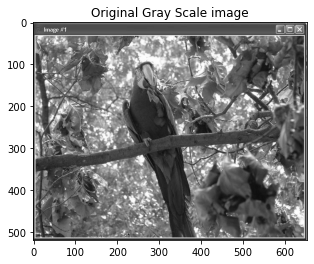

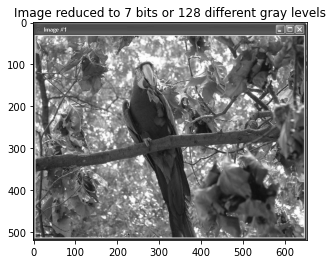

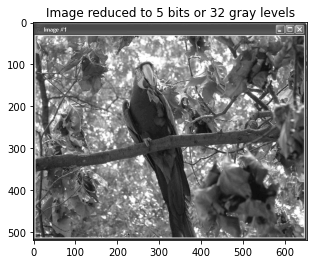

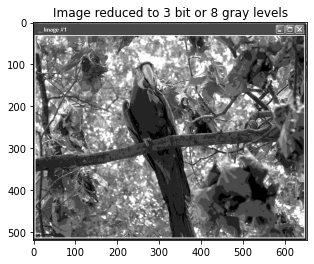

In [1]:
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import imageio
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
mgdata = imageio.imread(url, as_gray=True).astype(np.uint8)

c1 = mgdata & 0xFE  #  first 7 bits set to 1 - 11111110
c2 = mgdata & 0xF8  #  first 5 bits set to 1 - 11111000
c3 = mgdata & 0xE0  #  first 3 bits set to 1 - 11100000

plt.title('Original Gray Scale image')
plt.imshow(mgdata, cmap='gray')
plt.show()

plt.title('Image reduced to 7 bits or 128 different gray levels')
plt.imshow(c1, cmap='gray')
plt.show()

plt.title('Image reduced to 5 bits or 32 gray levels')
plt.imshow(c2, cmap='gray')
plt.show()

plt.title('Image reduced to 3 bit or 8 gray levels')
plt.imshow(c3, cmap='gray')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br><br>
2.  Write a script that loads a GIF image and counts the unique color levels therein.



Example pixel intensity from gif color palette 203

Number of unique color levels 146

R, G, B pixel values 204 213 255


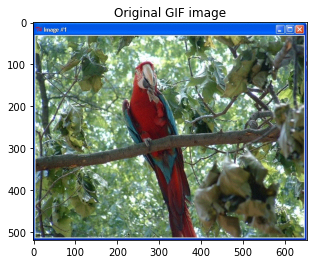

In [3]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#  load the image
path = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/Spring_2022/'
file = path + 'bird_js.gif'
img = Image.open(file)

#  need to convert image to numpy array to extract information
pix = np.array(img)
print('\nExample pixel intensity from gif color palette', pix[1,1])   #  access a single pixel directly using the gif color palette

#  number of unique color levels
(unique, counts) = np.unique(pix, return_counts=True)
print('\nNumber of unique color levels', len(unique))

#  NOT PART OF HOMEWORK
#  splitting the colors to RGB
rgb = img.convert('RGB')
r, g, b = rgb.getpixel((1, 1))  #  obtain the R, G, B pixel values
print('\nR, G, B pixel values', r, g, b)

plt.title('Original GIF image')
plt.imshow(img)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>
3.  Create a histogram of the intensities of your image.


Shape of the GIF image: (519, 653)

Intensity frequency distribution
      Intensity  Frequency
0            0       1340
1            1        780
2            2        365
3            3        784
4            4        276
..         ...        ...
141        245        398
142        248          3
143        249        139
144        250       2182
145        251       7598

[146 rows x 2 columns]

Minimum intensity count: 0
Maximum intensity count: 251

Minimum frequency count: 1
Maximum frequency count: 40473


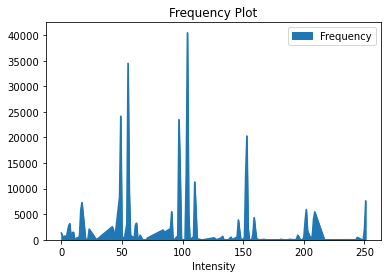

In [4]:
%matplotlib inline
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

#  load the image
path = 'C:/Users/pmsqu/Desktop/My_Docs/GMU/Class_Taught_Save/CDS468_Image_Operators/Spring_2022/'
file = path + 'bird_js.gif'
img = Image.open(file)

#  need to convert image to numpy array to extract information; transform to the GIF color index
pix = np.array(img)
print('\nShape of the GIF image:', pix.shape)

#  use a pandas dataframe
df1 = pd.Series(pix.flatten()).value_counts().reset_index().sort_values('index').reset_index(drop=True)
df1.columns = ['Intensity', 'Frequency']
print('\nIntensity frequency distribution\n', df1)

#  intensity min and max
intensity_Min = df1['Intensity']
min_intensity = intensity_Min.min()
print('\nMinimum intensity count:', min_intensity)
intensity_Max = df1['Intensity']
max_intensity = intensity_Max.max()
print('Maximum intensity count:', max_intensity)

#  frequency min and max
frequency_Min = df1['Frequency']
min_frequency = frequency_Min.min()
print('\nMinimum frequency count:', min_frequency)
frequency_Max = df1['Frequency']
max_frequency = frequency_Max.max()
print('Maximum frequency count:', max_frequency)

df1.plot.area(x='Intensity', y='Frequency')
plt.title('Frequency Plot') 
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>

# Color

For these problems use a color image that has regions with brilliant reds, greens, and blues. In the following problems this is called the test image.

1. Split the test image into its three R, G, B components and display each component as a gray scale image.  Write the operator notation for this process.

notation for isolating the red channel is
${\bf r}[\vec x] = \begin{Bmatrix}1 \\ \varnothing \\ \varnothing \end{Bmatrix} {\bf a}[\vec x]$<br><br><br>

notation for isolating the green channel is
${\bf g}[\vec x] = \begin{Bmatrix} \varnothing \\ 1 \\ \varnothing \end{Bmatrix} {\bf a}[\vec x]$<br><br><br>

notation for isolating the blue channel is
${\bf b}[\vec x] = \begin{Bmatrix}\varnothing \\ \varnothing \\ 1 \end{Bmatrix} {\bf a}[\vec x]$<br><br><br>


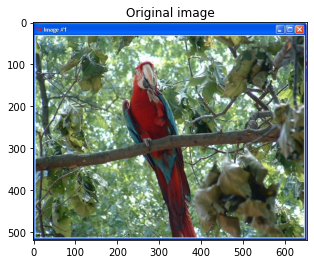

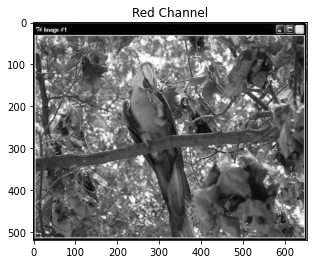

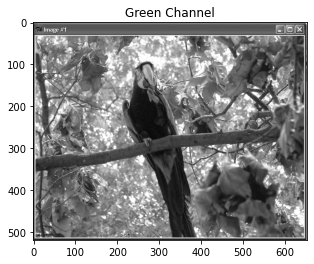

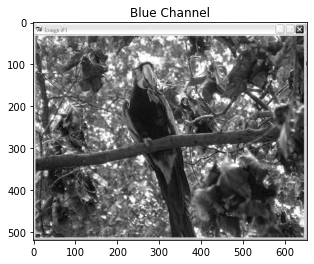

In [5]:
%matplotlib inline
import imageio
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url)
r, g, b = cv2.split(adata)

plt.title('Original image')
plt.imshow(adata)
plt.show()

plt.title('Red Channel')
plt.imshow(r, cmap='gray')
plt.show()

plt.title('Green Channel')
plt.imshow(g, cmap='gray')
plt.show()

plt.title('Blue Channel')
plt.imshow(b, cmap='gray')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>

2. Load the test image, exchange the RGB components such that the green information is now in the red channel, the blue information is now in the green channel and the red information is now in the blue channel.  Display this color image.  Write the operator notation for this process.

The color channels can be separated by:<br>

$\left\{\begin{array}{l}\mathbf{r}[\vec{x}] \\ \mathbf{g}[\vec{x}] \\ \mathbf{b}[\vec{x}]\end{array}\right\}=\mathcal{L}_{\operatorname{RGB}} \mathbf{a}[\vec{x}]$

Putting these channels in a different order to create a new image is:<br>

$\mathbf{c}[\vec{x}]=\left\{\begin{array}{l}\mathbf{g}[\vec{x}] \\ \mathbf{b}[\vec{x}] \\ \mathbf{r}[\vec{x}]\end{array}\right\}$


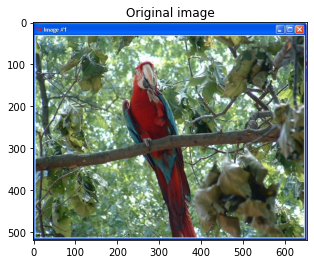

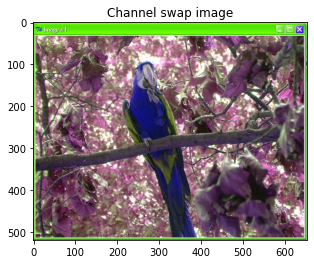

In [6]:
%matplotlib inline
import imageio
import scipy.ndimage as nd
import numpy as np
import matplotlib.pyplot as plt
import cv2

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url)

plt.title('Original image')
plt.imshow(adata)
plt.show()

r, g, b = cv2.split(adata)
adata = cv2.merge((g, b, r))

plt.title('Channel swap image')
plt.imshow(adata)
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>
3. Save the image created in #2 to a file.


In [ ]:
#  save the swap channel image
from PIL import Image

img = Image.fromarray(adata)
img.save('C:/Users/packo_000/Desktop/bird_swap_channels.jpg')

<br><br><br><br><br><br><br><br><br><br><br><br>
4. Convert the test image to the HSV components and display each channel as a gray scale image. Write the operator notation for this process.

Convert RGB to HSV operator notation

${\bf b}[\vec x] = \mathcal{L}_{HSV} {\bf a}[\vec x]$<br>



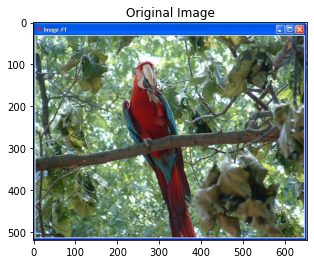

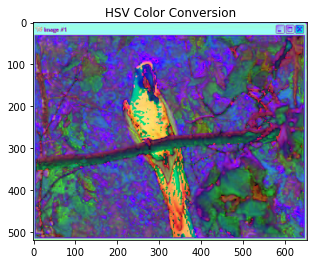

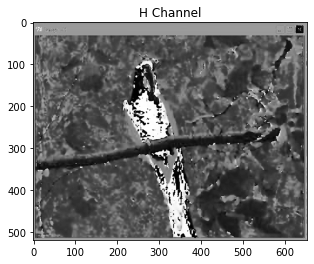

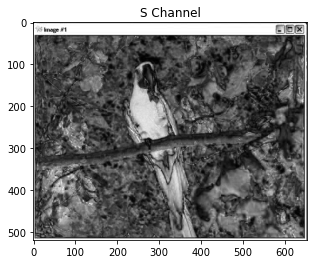

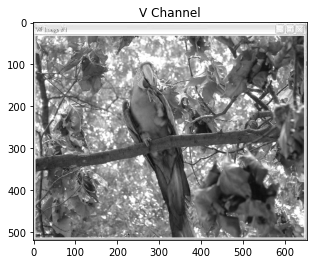

In [7]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import cv2
import colorsys
from skimage import color

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url)

plt.title('Original Image')
plt.imshow(adata)
plt.show()

adata = color.rgb2hsv(adata)
plt.title('HSV Color Conversion')
plt.imshow(adata)
plt.show()

h, s, v = cv2.split(adata)

plt.title('H Channel')
plt.imshow(h, cmap='gray')
plt.show()

plt.title('S Channel')
plt.imshow(s, cmap='gray')
plt.show()

plt.title('V Channel')
plt.imshow(v, cmap='gray')
plt.show()

<br><br><br><br><br><br><br><br><br><br><br><br>
5. Convert the test image to YIQ and display each channel as a gray scale image.  Write the operator notation for this process.

Convert RGB to YIQ operator notation

${\bf b}[\vec x] = \mathcal{L}_{YIQ} {\bf a}[\vec x]$<br>



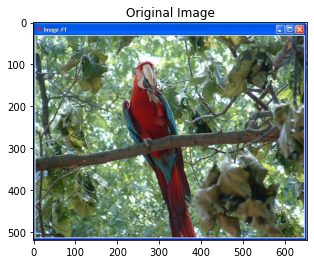

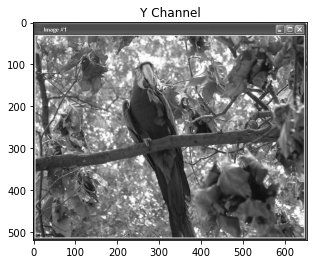

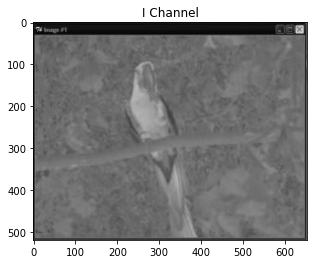

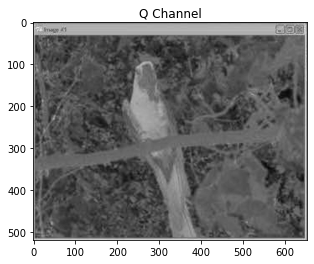

In [1]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import cv2
import colorsys
from skimage import color

url = 'https://raw.githubusercontent.com/joefoxva1/CDS468/master/Lecture2_3_4/bird_js.jpg'
adata = imageio.imread(url)

plt.title('Original Image')
plt.imshow(adata)
plt.show()

adata = color.rgb2yiq(adata)
y, i, q = cv2.split(adata)

plt.title('Y Channel')
plt.imshow(y, cmap='gray')
plt.show()

plt.title('I Channel')
plt.imshow(i, cmap='gray')
plt.show()

plt.title('Q Channel')
plt.imshow(q, cmap='gray')
plt.show()